<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/SYNA/ASSIGNMENT7_MODIN_SYNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 7: Comparison between libraries

## Library : Modin

### Group Name : SYNA
### Member Group :
| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| SARAH WARDINA BINTI RAFIDIN | A21EC0128 | Comparison
| NURUNNAJWA BINTI ZULKIFLI | A21EC0121 | PySpark
| ALYA DAMIA BINTI HUZAIMY | A21EC0159 | Modin
| YASMEEN NATASHA BINTI HAFIZ SHAHREL | A21EC0147 | Vaex

Date of submission : 26 December 2023



---



### Step 1: Select a real-world dataset

Choose a dataset larger than 1 GB from reputable sources such as Kaggle or Dataset Search. Ensure that you provide a link enabling your dataset's utilization on Google Colab.

We choose [Flight Status Prediction 2022](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022?select=Combined_Flights_2022.csv).

This dataset contains all flight information including cancellation and delays by airline for dates back to January 2022.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading Dataset

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Combined_Flights_2022.csv")

3. This line prints basic information about the dataset, including the data types of each column and the number of non-null values. It helps you understand the structure of your dataset

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

4. Display Summary Statistics:

In [ ]:
print(df.describe())

         CRSDepTime       DepTime  DepDelayMinutes      DepDelay  \
count  4.078318e+06  3.957885e+06     3.957823e+06  3.957823e+06   
mean   1.329587e+03  1.334374e+03     1.601494e+01  1.309049e+01   
std    4.904801e+02  5.056219e+02     5.231498e+01  5.332016e+01   
min    1.000000e+00  1.000000e+00     0.000000e+00 -7.800000e+01   
25%    9.140000e+02  9.170000e+02     0.000000e+00 -5.000000e+00   
50%    1.320000e+03  1.325000e+03     0.000000e+00 -2.000000e+00   
75%    1.735000e+03  1.744000e+03     1.100000e+01  1.100000e+01   
max    2.359000e+03  2.400000e+03     7.223000e+03  7.223000e+03   

            ArrTime  ArrDelayMinutes       AirTime  CRSElapsedTime  \
count  3.954079e+06     3.944916e+06  3.944916e+06    4.078318e+06   
mean   1.457886e+03     1.578307e+01  1.110075e+02    1.413211e+02   
std    5.431841e+02     5.198424e+01  6.996246e+01    7.179635e+01   
min    1.000000e+00     0.000000e+00  8.000000e+00   -4.800000e+01   
25%    1.046000e+03     0.000000e+00 

This line prints summary statistics (mean, standard deviation, min, max, etc.) for numerical columns in the dataset. It provides an overview of the distribution of numerical features.

5. Check for Missing Values:

In [ ]:
print(df.isnull().sum())

FlightDate                 0
Airline                    0
Origin                     0
Dest                       0
Cancelled                  0
                       ...  
ArrDel15              133402
ArrivalDelayGroups    133402
ArrTimeBlk                 0
DistanceGroup              0
DivAirportLandings         0
Length: 61, dtype: int64


This line prints the number of missing values in each column. Identifying missing data is crucial for data cleaning and imputation.

6. Explore Categorical Variables

In [ ]:
print(df['Airline'].value_counts())
print(df['Origin'].value_counts())
print(df['Dest'].value_counts())

Southwest Airlines Co.                       731925
Delta Air Lines Inc.                         512114
American Airlines Inc.                       495953
SkyWest Airlines Inc.                        440807
United Air Lines Inc.                        352009
Republic Airlines                            197881
JetBlue Airways                              156793
Envoy Air                                    150758
Endeavor Air Inc.                            142624
Comair Inc.                                  135884
Alaska Airlines Inc.                         129510
Spirit Air Lines                             129208
Frontier Airlines Inc.                        86557
Allegiant Air                                 73504
Mesa Airlines Inc.                            71972
Horizon Air                                   56320
Capital Cargo International                   52827
Commutair Aka Champlain Enterprises, Inc.     44367
Hawaiian Airlines Inc.                        42212
Air Wisconsi

These lines display the counts of unique values in categorical columns like 'Airline', 'Origin', and 'Dest'. It helps you understand the distribution of categorical variables.

7. Visualize the Distribution of Numerical Features

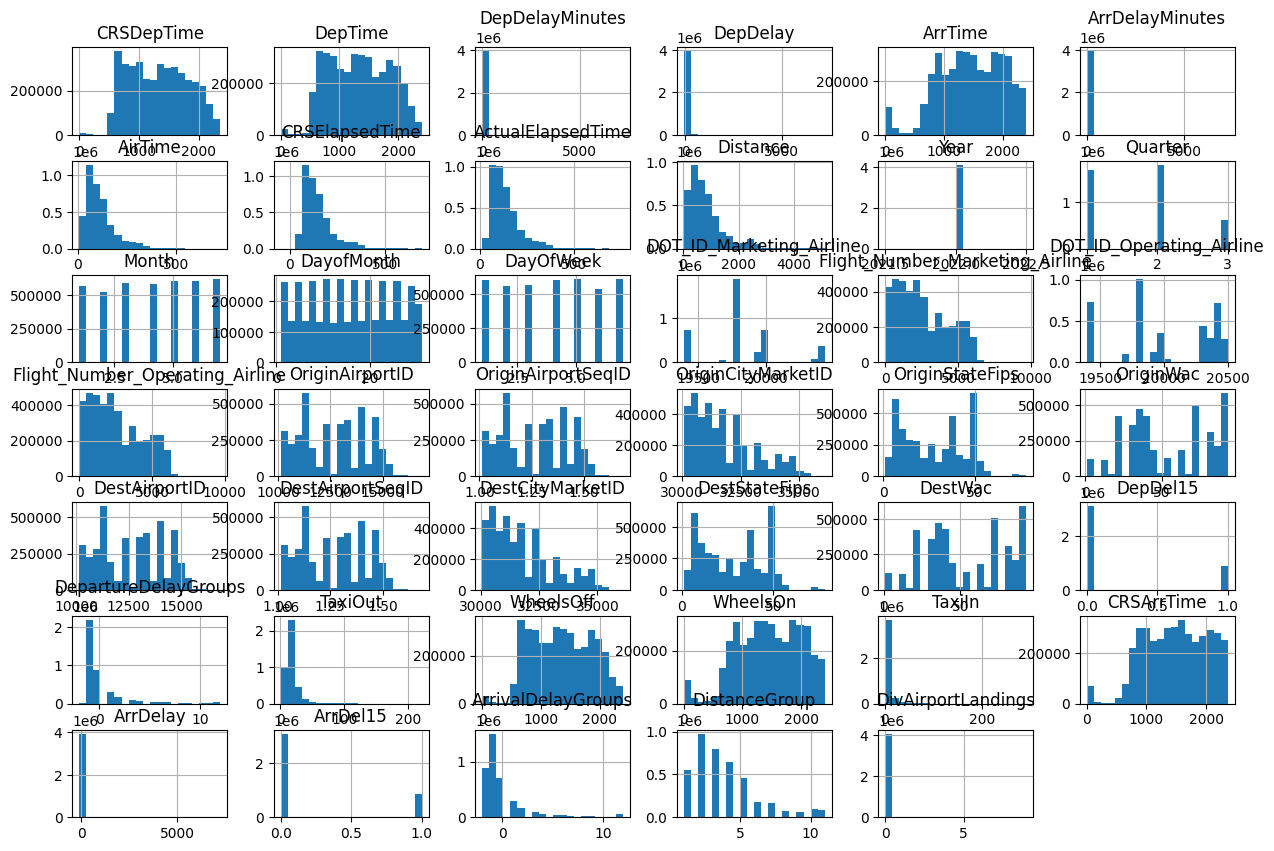

In [ ]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

This code generates histograms for numerical columns, providing a visual representation of the data distribution.

8. Explore Relationships Between Features

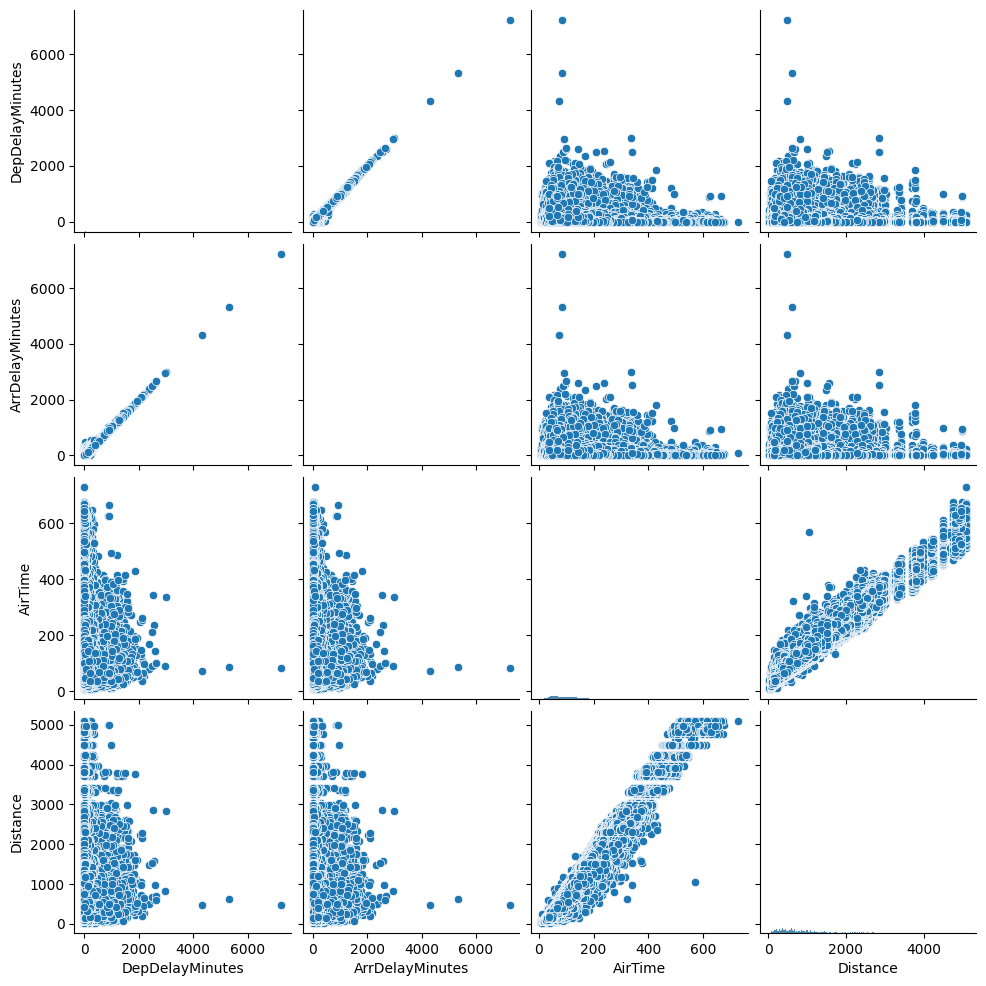

In [ ]:
sns.pairplot(df[['DepDelayMinutes', 'ArrDelayMinutes', 'AirTime', 'Distance']])
plt.show()

This creates a pair plot to visualize relationships between numerical features. It helps identify patterns and potential correlations

9. Correlation Matrix

<ipython-input-11-7b324e919061>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


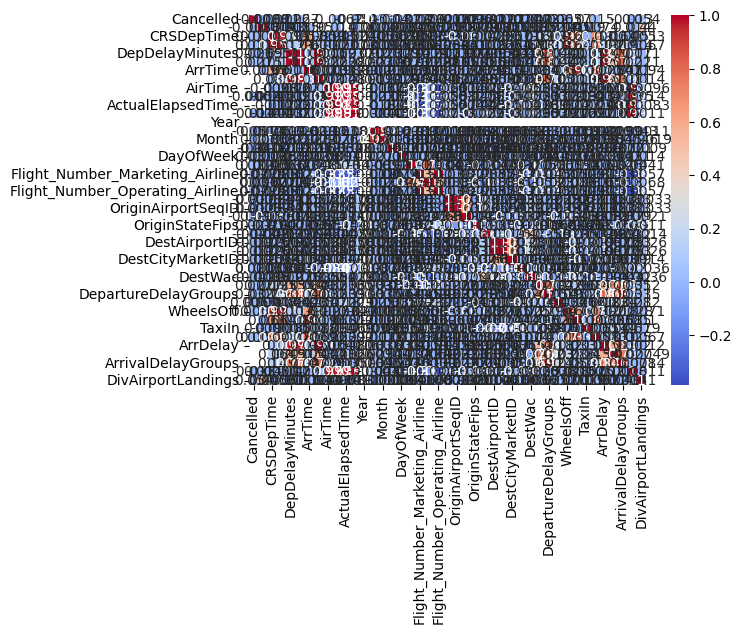

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

This generates a heatmap of the correlation matrix, showing the correlation between numerical features. It helps identify strong correlations.

10. Explore the Distribution of Delays

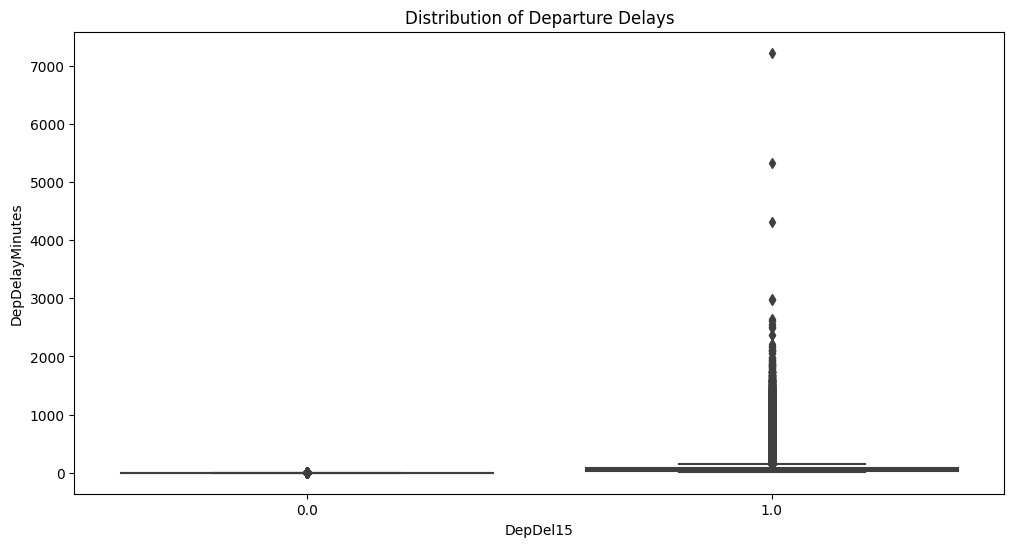

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DepDel15', y='DepDelayMinutes', data=df)
plt.title('Distribution of Departure Delays')
plt.show()

This code creates a boxplot to visualize the distribution of departure delays, helping you understand the variability and presence of outliers

11. Feature Engineering - Day of the Week

In [ ]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
print("\nDataFrame after converting 'FlightDate' to datetime:")
print(df.info())


DataFrame after converting 'FlightDate' to datetime:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 61 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   FlightDate                               datetime64[ns]
 1   Airline                                  object        
 2   Origin                                   object        
 3   Dest                                     object        
 4   Cancelled                                bool          
 5   Diverted                                 bool          
 6   CRSDepTime                               int64         
 7   DepTime                                  float64       
 8   DepDelayMinutes                          float64       
 9   DepDelay                                 float64       
 10  ArrTime                                  float64       
 11  ArrDelayMinutes                    

In [ ]:
df['DayOfWeek'] = df['FlightDate'].dt.day_name()

This code converts the 'FlightDate' column to datetime and creates a new feature 'DayOfWeek'. It helps explore patterns related to the day of the week

12. Visualize Average Delay by Day of the Week

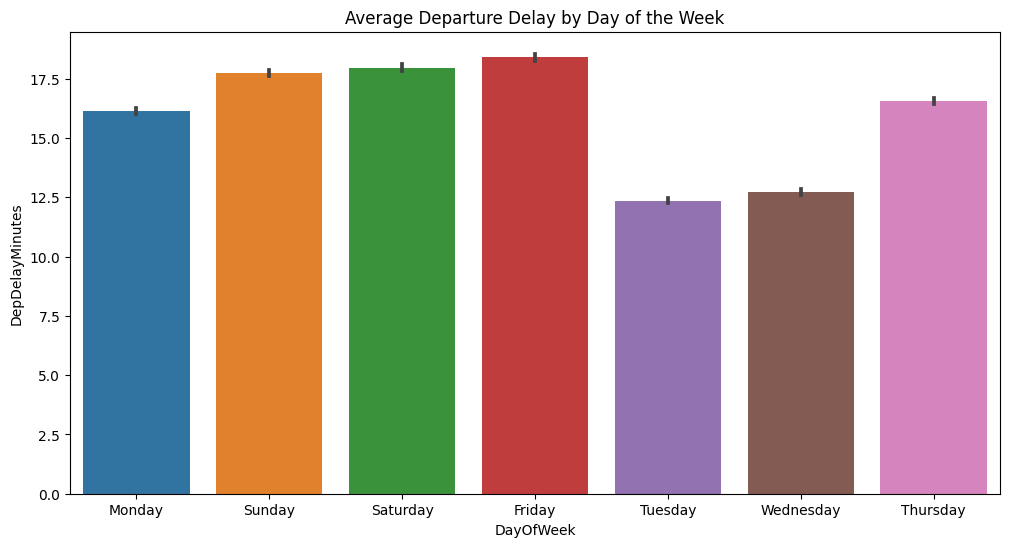

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='DepDelayMinutes', data=df)
plt.title('Average Departure Delay by Day of the Week')
plt.show()

This creates a bar plot to visualize the average departure delay for each day of the week. It helps identify if delays are correlated with specific days